# Topic Modeling

In [5]:
import nltk
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF

In [7]:
# Split each set of essays and collect into a single corpus
corpus = open("Data/FederalistPapers.txt")
feds = corpus.read()
feds = feds.split("FEDERALIST")
corpse = open("Data/AntiFederalistPapers.txt")
antifeds = corpse.read()
antifeds = antifeds.split("Antifederalist")
both = feds + antifeds

In [8]:
# Instantiate TFIDF vectorizer, fit, transform, and view as a dataframeTfidfVectorizer
cv_tfidf = TfidfVectorizer(stop_words='english')
X = cv_tfidf.fit_transform(both[1:])
pd.DataFrame(X.toarray(),columns=cv_tfidf.get_feature_names())

,000,10,100,11,12,125,128,12th,13,130,...,york,young,youngest,zaleucus,zeal,zealand,zealots,zealous,zealously,zones
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.015479,0.000000,0.0,0.0,0.102799,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.013753,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.014479,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.013556,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.040393,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.014629,0.039448,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.025324,0.0,0.0,...,0.006798,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
162,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.016323,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
163,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
164,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.010250,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## Sentiment and pairwise distance EDA

In [9]:
from sklearn.metrics import pairwise_distances
from numpy import dot
from numpy.linalg import norm

In [10]:
sentiments = []
for i in range(0,len(both)):
    sentiments.append(TextBlob(both[i]).sentiment)

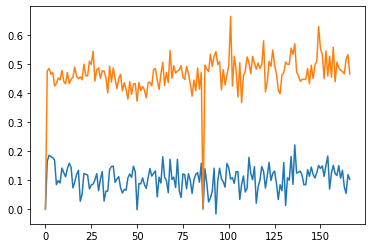

In [11]:
plt.plot(sentiments)

In [12]:
pairwise_tfidf = pairwise_distances(X)

(86.0, 0.0)

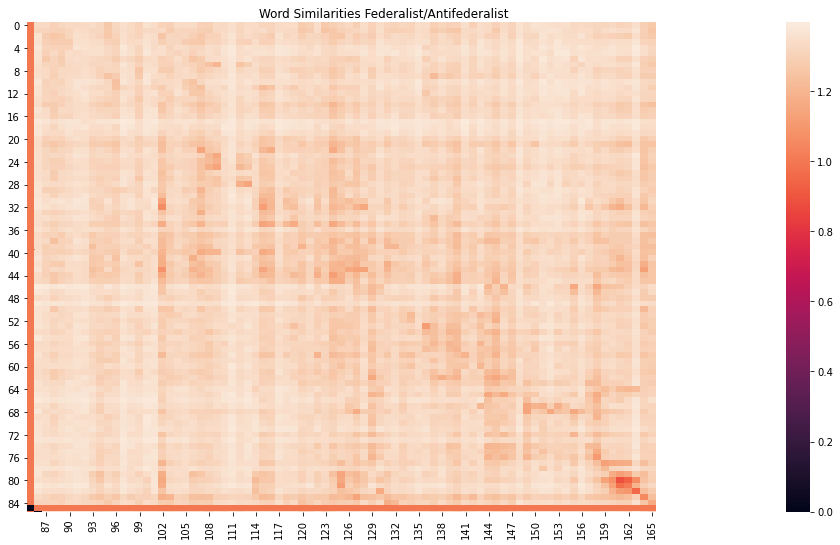

In [13]:
#Single quadrant of pairwise distances 

plt.figure(figsize=[16,9])
sns.heatmap(pairwise_tfidf)
plt.title("Word Similarities Federalist/Antifederalist");
plt.xlim(85,177)  
plt.ylim(86,0)  
#plt.savefig('Comparison.png')

## Explore NMF topics

In [14]:
# Document-topic matrix
nmf_both = NMF(8)
feds_topic = nmf_both.fit_transform(X)
feds_topic.shape

(166, 8)

In [15]:
# Topic-word matrix
topic_word = nmf_both.components_
topic_word.shape

(8, 10784)

In [16]:
# Top 25 words in each topic
words = cv_tfidf.get_feature_names()
t = nmf_both.components_.argsort(axis=1)[:,-1:-25:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['government',
  'national',
  'union',
  'state',
  'states',
  'people',
  'federal',
  'authority',
  'governments',
  'ought',
  'particular',
  'objects',
  'public',
  'members',
  'citizens',
  'common',
  'extent',
  'local',
  'force',
  'society',
  'principle',
  'different',
  'general',
  'majority'],
 ['executive',
  'president',
  'senate',
  'power',
  'legislative',
  'office',
  'body',
  'magistrate',
  'council',
  'powers',
  'appointment',
  'shall',
  'appointments',
  'legislature',
  'treaties',
  'governor',
  'man',
  'departments',
  'officers',
  'department',
  'constitution',
  'chief',
  'branch',
  'offices'],
 ['courts',
  'court',
  'jury',
  'jurisdiction',
  'cases',
  'supreme',
  'judicial',
  'law',
  'trial',
  'appellate',
  'constitution',
  'state',
  'inferior',
  'judges',
  'causes',
  'states',
  'laws',
  'criminal',
  'judiciary',
  'power',
  'appeal',
  'cognizance',
  'legislature',
  'appeals'],
 ['power',
  'congress',
  'states',

## Prepare lemmatized document term matrix

In [17]:
short = both.copy()

In [18]:
# Remove numbers
import re
import string
truncs = []
for doc in short:
    truncs.append(re.sub('\w*\d\w*', '', doc))

In [19]:
# Remove line breaks
fedd = [doc.replace('\n',' ') for doc in truncs if doc != '']

In [20]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Break up words in each essay
fedlems = []
for essay in fedd:
    fedlems.append(nltk.word_tokenize(essay))

# Remove punctuation
for essay in fedlems:
    for word in essay:
        if word in string.punctuation:
            essay.remove(word)
        else:
            continue

# Lemmatize words in essays with WordNetLemmatizer
fedlemmings = []
for essay in fedlems:
    wordds = ""
    for word in essay:
        wordds += wordnet_lemmatizer.lemmatize(word) + " "
    fedlemmings.append(wordds)
    
# TFIDF vectorize lemmatized word docs
lem_vectorizer = TfidfVectorizer(stop_words = 'english')
lem_vectorizer.fit(fedlemmings)
fed_word = lem_vectorizer.transform(fedlemmings).transpose()
pd.DataFrame(fed_word.toarray(), lem_vectorizer.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.026275,0.0,0.0,0.0,0.0
abandon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
abandoned,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
abandoning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## LDA with lemmatized word docs

In [21]:
from gensim import corpora, models, similarities, matutils

In [22]:
fedcorpus = matutils.Sparse2Corpus(fed_word)

In [23]:
id2word = dict((v, k) for k, v in lem_vectorizer.vocabulary_.items())

In [24]:
fed_lda = models.LdaModel(corpus=fedcorpus, num_topics=8, id2word=id2word, passes=5)

In [25]:
fed_lda.print_topics()

[(0,
  '0.000*"newport" + 0.000*"power" + 0.000*"executive" + 0.000*"people" + 0.000*"cantons" + 0.000*"government" + 0.000*"department" + 0.000*"state" + 0.000*"legislative" + 0.000*"sir"'),
 (1,
  '0.001*"state" + 0.001*"government" + 0.001*"states" + 0.001*"power" + 0.001*"standing" + 0.001*"election" + 0.001*"national" + 0.001*"local" + 0.001*"taxation" + 0.001*"union"'),
 (2,
  '0.001*"state" + 0.001*"congress" + 0.000*"government" + 0.000*"states" + 0.000*"shall" + 0.000*"people" + 0.000*"power" + 0.000*"federal" + 0.000*"exciseman" + 0.000*"law"'),
 (3,
  '0.001*"government" + 0.001*"power" + 0.000*"constitution" + 0.000*"state" + 0.000*"states" + 0.000*"emperor" + 0.000*"tax" + 0.000*"vacancy" + 0.000*"law" + 0.000*"new"'),
 (4,
  '0.004*"government" + 0.004*"power" + 0.004*"state" + 0.003*"people" + 0.002*"constitution" + 0.002*"states" + 0.002*"ha" + 0.002*"law" + 0.002*"shall" + 0.002*"men"'),
 (5,
  '0.000*"born" + 0.000*"slave" + 0.000*"humble" + 0.000*"low" + 0.000*"state

In [26]:
lda_corpus = fed_lda[fedcorpus]

In [28]:
lda_docs = [doc for doc in lda_corpus]

In [34]:
# Check the border between the two sets of essays for topic
lda_docs[80:90]

[[(4, 0.95091695)],
 [(0, 0.010315206),
  (1, 0.010335597),
  (2, 0.010316258),
  (3, 0.010315847),
  (4, 0.9277707),
  (5, 0.010315266),
  (6, 0.010315597),
  (7, 0.010315556)],
 [(4, 0.9489735)],
 [(4, 0.9609686)],
 [(4, 0.9618997)],
 [(0, 0.125),
  (1, 0.125),
  (2, 0.125),
  (3, 0.125),
  (4, 0.125),
  (5, 0.125),
  (6, 0.125),
  (7, 0.125)],
 [(4, 0.9461651)],
 [(4, 0.9546477)],
 [(4, 0.9505752)],
 [(4, 0.95021117)]]

## All essays are converging at topic 4, this doesn't seem to be as informative as NMF